In [1]:
import numpy as np
import freegs
from freegs.plotting import plotConstraints
from freegs.critical import find_critical
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import sys
import matplotlib.pyplot as plt
from copy import deepcopy
from IPython.display import display, clear_output
import time

%load_ext autoreload
%autoreload 2

In [2]:
# import pickle
# with open('../freegsnke/Fiesta_full_passive.pk', 'rb') as f:
#     data = pickle.load(f)
# passive_coils = []
# # R, Z, dR, dZ, resistivity
# for l in data[0]:
#     passive_coils.append({
#         "R": l[0],
#         "Z": l[1],
#         "dR": l[2],
#         "dZ": l[3],
#         "resistivity": l[4]
#     })

# pickle.dump(passive_coils, open("passive_coils.pk", "wb"))


In [3]:
# rwall = [1.56442 , 1.73298 , 1.34848 , 1.0882  , 0.902253, 0.903669,
#     0.533866, 0.538011, 0.332797, 0.332797, 0.334796, 0.303115,
#     0.305114, 0.269136, 0.271135, 0.260841, 0.260841, 0.271135,
#     0.269136, 0.305114, 0.303115, 0.334796, 0.332797, 0.332797,
#     0.538598, 0.534469, 0.90563 , 0.904219, 1.0882  , 1.34848 ,
#     1.73018 , 1.56442 , 1.37999 , 1.37989 , 1.19622 , 1.19632 ,
#     1.05537 , 1.05528 , 0.947502, 0.905686, 0.899143, 0.883388,
#     0.867681, 0.851322, 0.833482, 0.826063, 0.822678, 0.821023,
#     0.820691, 0.822887, 0.827573, 0.839195, 0.855244, 0.877567,
#     0.899473, 1.18568 , 1.279   , 1.296   , 1.521   , 1.521   ,
#     1.8     , 1.8     , 1.521   , 1.521   , 1.296   , 1.279   ,
#     1.18568 , 0.899473, 0.877567, 0.855244, 0.839195, 0.827573,
#     0.822887, 0.820691, 0.821023, 0.822678, 0.826063, 0.833482,
#     0.851322, 0.867681, 0.883388, 0.899143, 0.905686, 0.947502,
#     1.05528 , 1.05537 , 1.19632 , 1.19622 , 1.37989 , 1.37999 ,
#     1.56442 ]

# zwall = [ 1.56424 ,  1.67902 ,  2.06041 ,  2.05946 ,  1.87565 ,  1.87424 ,
#     1.50286 ,  1.49874 ,  1.29709 ,  1.094   ,  1.094   ,  0.8475  ,
#     0.8475  ,  0.565   ,  0.565   ,  0.495258, -0.507258, -0.577   ,
#     -0.577   , -0.8595  , -0.8595  , -1.106   , -1.106   , -1.30909 ,
#     -1.5099  , -1.51403 , -1.88406 , -1.88547 , -2.06614 , -2.06519 ,
#     -1.68099 , -1.56884 , -1.57688 , -1.57673 , -1.58475 , -1.5849  ,
#     -1.59105 , -1.59091 , -1.59561 , -1.59556 , -1.59478 , -1.59026 ,
#     -1.58087 , -1.56767 , -1.54624 , -1.52875 , -1.51517 , -1.49624 ,
#     -1.47724 , -1.44582 , -1.41923 , -1.38728 , -1.35284 , -1.3221  ,
#     -1.30018 , -1.0138  , -0.8423  , -0.8202  , -0.8202  , -0.25    ,
#     -0.25    ,  0.25    ,  0.25    ,  0.8156  ,  0.8156  ,  0.8377  ,
#     1.0092  ,  1.29558 ,  1.3175  ,  1.34824 ,  1.38268 ,  1.41463 ,
#     1.44122 ,  1.47264 ,  1.49164 ,  1.51057 ,  1.52415 ,  1.54164 ,
#     1.56307 ,  1.57627 ,  1.58566 ,  1.59018 ,  1.59096 ,  1.59101 ,
#     1.58631 ,  1.58645 ,  1.5803  ,  1.58015 ,  1.57213 ,  1.57228 ,
#     1.56424 ]

# wall = []
# for i in range(len(rwall)):
#     wall.append({"R": rwall[i], "Z": zwall[i]})

# pickle.dump(wall, open("wall.pk", "wb"))

In [4]:
# with open('../machine_configs/MAST-U/passive_coils.pk', 'rb') as f:
#     passive_coils = pickle.load(f)
# passive_coils

In [5]:
# with open('../machine_configs/MAST-U/active_coils.pkl', 'rb') as f:
#     active_coils = pickle.load(f)
# active_coils

In [6]:
# %matplotlib notebook

In [2]:
# Create the machine, which specifies coil locations
# and equilibrium, specifying the domain to solve over
# this has to be either
# freegs.machine.MASTU(), in which case:
#tokamak = freegs.machine.MASTU()
# or
# MASTU_coils.MASTU_wpass()
import os
os.environ["ACTIVE_COILS_PATH"] = "../machine_configs/MAST-U/active_coils.pickle"
os.environ["PASSIVE_COILS_PATH"] = "../machine_configs/MAST-U/passive_coils.pickle"
os.environ["WALL_PATH"] = "../machine_configs/MAST-U/wall.pickle"
os.environ["LIMITER_PATH"] = "../machine_configs/MAST-U/limiter.pickle"

from freegsnke import machine_config
from freegsnke import build_machine
from freegsnke import faster_shape

tokamak = build_machine.tokamak()


# Creates equilibrium object and initializes it with 
# a "good" solution
# plasma_psi = np.loadtxt('plasma_psi_example.txt')
eq = freegs.Equilibrium(tokamak=tokamak,
                        #domains can be changed 
                        Rmin=0.1, Rmax=2.0,    # Radial domain
                        Zmin=-2.2, Zmax=2.2,   # Height range
                        #grid resolution can be changed
                        nx=65, ny=129, # Number of grid points
                        # psi=plasma_psi[::2,:])   
                        )  



# Sets desired plasma properties for the 'starting equilibrium'
# Use one between ConstrainPaxisIp or ConstrainBetapIp
# values can be changed
from freegsnke.jtor_update import ConstrainPaxisIp
profiles = ConstrainPaxisIp(eq, tokamak.limiter,
                            8.1e3, # Plasma pressure on axis [Pascals]
                            6.2e5, # Plasma current [Amps]
                            0.5, # vacuum f = R*Bt
                            alpha_m = 1.8,
                            alpha_n = 1.2)
# from freegsnke.jtor_update import ConstrainBetapIp
# profiles = ConstrainBetapIp(eq, tokamak.limiter,
#                             0.2, # Plasma pressure on axis [Pascals]
#                             6.2e5, # Plasma current [Amps]
#                             0.5, # vacuum f = R*Bt
#                             alpha_m = 1.8,
#                             alpha_n = 1.2)


# Sets some shape constraints (here very close to those used for initialization)
Rx = 0.6
Zx = 1.1

Rmid = 1.41   # Outboard midplane
Rin = 0.36  # Inboard midplane

xpoints = [(Rx, -Zx-.01),   # (R,Z) locations of X-points
           (Rx,  Zx)]
isoflux = [
           (Rx,Zx, Rx,-Zx),
           (Rmid, 0, Rin, 0.0),
           (Rmid,0, Rx,Zx),
           (Rmid,0, 1.2,.7),
           (Rmid,0, 1.2,-.7),
    
           # Link inner and outer midplane locations
           (Rx, Zx, .85, 1.7),
           (Rx, Zx, .75, 1.6),
           (Rx, Zx, Rin, 0.2),
           (Rx, Zx, Rin, 0.1),
           (Rx,-Zx, Rin, -0.1),
           (Rx,-Zx, Rin, -0.2),
           (Rx,-Zx, .85, -1.7),
           (Rx,-Zx, .75, -1.6),

           (Rx,-Zx, 0.45, -1.8),
           (Rx, Zx, 0.45,  1.8),
           ]

eq.tokamak['P6'].current = 0
eq.tokamak['P6'].control = False
eq.tokamak['Solenoid'].control = False

constrain = freegs.control.constrain(xpoints=xpoints, 
                                     gamma=5e-6, 
                                     isoflux=isoflux
                                    )
constrain(eq)
                                    
from freegsnke import GSstaticsolver
NK = GSstaticsolver.NKGSsolver(eq)                        


Text(0.5, 1.0, 'q profile')

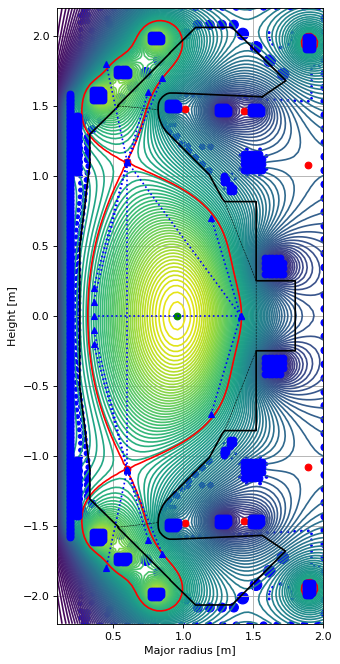

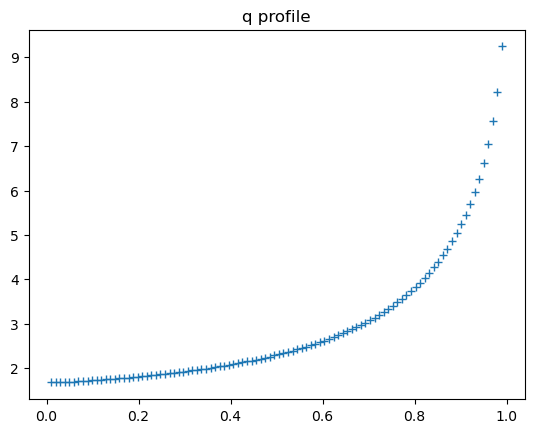

In [6]:
eq.tokamak['P6'].current = 0
eq.tokamak['P6'].control = False
eq.tokamak['Solenoid'].control = False
eq.tokamak['Solenoid'].current = 15000
# Nonlinear solve
freegs.solve(eq,          # The equilibrium to adjust
             profiles,    # The plasma profiles
             constrain,   # Plasma control constraints
             show=False,
             rtol=3e-3)               
eq.tokamak['Solenoid'].current = 40000
freegs.solve(eq,          # The equilibrium to adjust
             profiles,    # The plasma profiles
             constrain,   # Plasma control constraints
             show=False,
             rtol=3e-3)  
NK.solve(eq, profiles, target_relative_tolerance=1e-8)
fig = plt.figure(figsize=(5, 10), dpi=80);
ax = fig.add_subplot(111);
ax.grid(True,which='both');
eq.plot(axis=ax,show=False);
eq.tokamak.plot(axis=ax,show=False);
constrain.plot(axis=ax,show=False)

qprof = eq.q()
plt.figure()
plt.plot(qprof[0], qprof[1], '+')
plt.title('q profile')

In [4]:
# Initialize the evolution object
# This uses the starting equilibrium to get all the geometric constraints/grids etc
from freegsnke import nonlinear_solve
stepping = nonlinear_solve.nl_solver(profiles=profiles, eq=eq, 
                                         max_mode_frequency=10**2.5, 
                                         full_timestep=1e-3, 
                                         max_internal_timestep=1e-3,
                                         plasma_resistivity=5e-7,
                                         plasma_domain_mask=None,
                                         automatic_timestep=False,#(1/10, 1/10),
                                         mode_removal=True,
                                         min_dIy_dI=1,
                                         )

# In absence of a policy, this calculates the active voltages U_active
# to maintain the currents needed for the equilibrium statically
U_active = (stepping.vessel_currents_vec*stepping.evol_metal_curr.R)[:stepping.evol_metal_curr.n_active_coils]

Input max_mode_frequency corresponds to  29  independent vessel normal modes in addition to the  12  active coils.
I'm building the linearization wrt the currents. This may take a minute or two.
0 deltaI =  2.6094142144398633 norm(deltaIy) = 10.011934963379414
1 deltaI =  1.4247131045634758 norm(deltaIy) = 9.981709231502043
2 deltaI =  1.3475217750605641 norm(deltaIy) = 9.980203463425047
3 deltaI =  1.303393043583788 norm(deltaIy) = 9.979800703514865
4 deltaI =  1.1644622415882517 norm(deltaIy) = 9.981854314711981
5 deltaI =  0.5500686251893133 norm(deltaIy) = 9.998188009835527
6 deltaI =  0.5356073005589336 norm(deltaIy) = 9.998490997531707
7 deltaI =  0.42098995311529536 norm(deltaIy) = 10.003788087376766
8 deltaI =  0.3945134920658003 norm(deltaIy) = 10.005476329778558
9 deltaI =  0.1134285585671761 norm(deltaIy) = 10.04196917456013
10 deltaI =  0.06307736628666352 norm(deltaIy) = 10.013237359838323
11 deltaI =  0.13203673374982694 norm(deltaIy) = 9.994304415892614
12 deltaI =  0.44

'Step: 49/49'

'current time t = 0.04900000000000004'

'current time step dt = 0.001'

starting: curr residual 9.931109963691915 0.8392987612803341
[0, 'psi cycle skipped', 0, 'times, psi_residual', 0.0004563564214835926]
[0, 'intermediate curr residual', 9.931109963691915, 0.8392987612803341]
[0, 'curr_coeffs = ', array([1.28674412])]
[0, 'full cycle curr residual', 0.6394898648856994, 0.0568904938494683]
[0, 'GS residual: ', 0.3320977925816958]
[1, 'psi cycle skipped', 1, 'times, psi_residual', 0.00014963598826377156]
[1, 'intermediate curr residual', 6.488962925201095, 0.7870889450879813]
[1, 'curr_coeffs = ', array([1.02172607])]
[1, 'full cycle curr residual', 0.027230303034825393, 0.004357395210298883]
[1, 'GS residual: ', 0.05863565847277239]
[2, 'psi cycle skipped', 2, 'times, psi_residual', 9.659568542414593e-05]
[2, 'psi_coeffs = ', array([-0.73928119, -0.80944374])]
[2, 'intermediate curr residual', 1.7094810145473114, 0.35565979319509405]
[2, 'curr_coeffs = ', array([1.04622822])]
[2, 'full cycle curr residual', 0.10676934692555871, 0.014575426475169153]
[2, 

Text(0, 0.5, 'Plasma elongation')

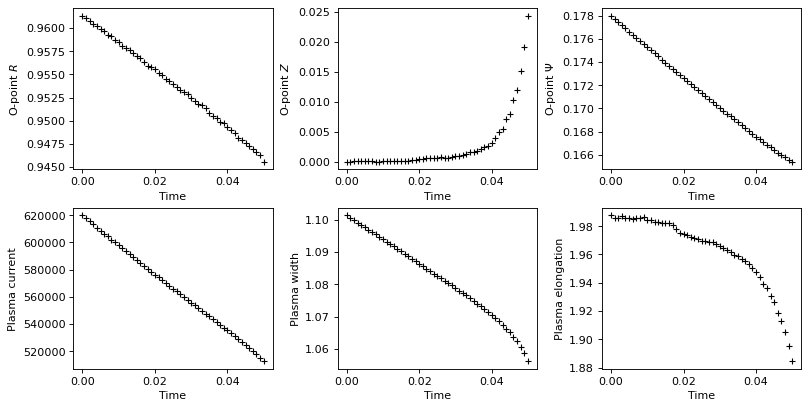

In [5]:
# Example of evolution with constant applied voltages
t = 0
flag = 0
history_times = [t]
t_per_step = []


#use the following to reset stepping.eq1 to a new IC
stepping.initialize_from_ICs(eq, profiles,
                            )
                            #  noise_level=.001, 
                            #  noise_vec=None,
                            #  update_linearization=False,
                            #  update_n_steps=12,
                            #  threshold_svd=.15)
# eqs = deepcopy(stepping.eq1)

history_currents = [stepping.currents_vec]
history_equilibria = [deepcopy(stepping.eq1)]
shapes = faster_shape.shapes_f(stepping.eq1, stepping.profiles1)
history_width = [shapes[0]]
history_o_points = shapes[1]
history_elongation = [shapes[2]]
# history_dJs = [stepping.dJ]

counter = 0
max_count = 50
while flag<1 and counter<max_count:
    clear_output(wait=True)
    display(f'Step: {counter}/{max_count-1}')
    display(f'current time t = {t}')
    display(f'current time step dt = {stepping.dt_step}')
    
    t_start = time.time()

    flag = stepping.nlstepper(active_voltage_vec=U_active, 
                                        target_relative_tol_currents=.005,
                                        target_relative_tol_GS=.005,
                                        
                                        # profile parameters are being jittered around at random 
                                        profile_parameter=8.1e3*(1+0.001*np.random.randn()),
                                        profile_coefficients=np.array([1.8*(1+0.0001*np.random.randn()),
                                                                       1.2*(1+0.0001*np.random.randn())]),

                                        # working_relative_tol_GS=.002,
                                        # target_relative_unexplained_residual=.5,
                                        # max_n_directions=3,
                                        # max_Arnoldi_iterations=3,
                                        # max_collinearity=.3,
                                        # step_size_psi=2.,
                                        # step_size_curr=.8,
                                        # scaling_with_n=0,
                                        # relative_tol_for_nk_psi=.002,
                                        # blend_GS=.5,
                                        # blend_psi=1,
                                        # curr_eps=1e-8,
                                        # max_no_NK_psi=1.,
                                        # clip=5,
                                        # threshold=1.5,
                                        # clip_hard=1.5,
                                        verbose=True,
                                        linear_only=False)       

   
    t_end = time.time()
    t_per_step.append(t_end-t_start)

    t += stepping.dt_step
    history_times.append(t)
    shapes = faster_shape.shapes_f(stepping.eq2, stepping.profiles2)

    history_currents.append(stepping.currents_vec)
    history_equilibria.append(deepcopy(stepping.eq2))
    history_width.append(shapes[0])
    history_o_points = np.append(history_o_points,shapes[1], axis=0)
    history_elongation.append(shapes[2])
    # history_dJs.append(stepping.dJ)
    counter += 1

history_currents = np.array(history_currents)
history_times = np.array(history_times)
history_o_points = np.array(history_o_points)


# Evolution of tracked values
fig, axs = plt.subplots(2, 3, figsize=(10, 5), dpi=80, constrained_layout=True)
axs_flat = axs.flat

axs_flat[0].plot(history_times, history_o_points[:, 0],'k+')
axs_flat[0].set_xlabel('Time')
axs_flat[0].set_ylabel('O-point $R$')

axs_flat[1].plot(history_times, history_o_points[:, 1],'k+')
axs_flat[1].set_xlabel('Time')
axs_flat[1].set_ylabel('O-point $Z$')

axs_flat[2].plot(history_times, history_o_points[:, 2],'k+')
axs_flat[2].set_xlabel('Time')
axs_flat[2].set_ylabel('O-point $\Psi$')

axs_flat[3].plot(history_times, history_currents[:,-1]*stepping.plasma_norm_factor,'k+')
axs_flat[3].set_xlabel('Time')
axs_flat[3].set_ylabel('Plasma current')

axs_flat[4].plot(history_times, history_width,'k+')
axs_flat[4].set_xlabel('Time')
axs_flat[4].set_ylabel('Plasma width')

axs_flat[5].plot(history_times, history_elongation,'k+')
axs_flat[5].set_xlabel('Time')
axs_flat[5].set_ylabel('Plasma elongation')

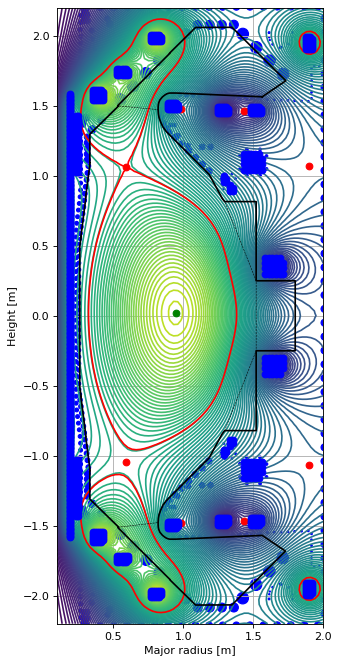

In [6]:
fig = plt.figure(figsize=(5, 10), dpi=80);
ax = fig.add_subplot(111);
ax.grid(True,which='both');
history_equilibria[-1].plot(axis=ax,show=False);
eq.tokamak.plot(axis=ax,show=False);